<a href="https://colab.research.google.com/github/hariharasudan1/Project1/blob/main/Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_excel("/content/Customer-Churn.xlsx")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# STEP 2: Clean the Data

In [11]:

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "", regex=False)
df.columns = df.columns.str.replace("\t", "", regex=False)

if "customerID" in df.columns:
    df = df.drop("customerID", axis=1)

df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# STEP 3: Convert Categorical Columns to Numbers

In [12]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


# STEP 4: Split Data into Training and Testing

In [13]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# STEP 5: Train Machine Learning Model

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# STEP 6: Predict & Check Accuracy

In [15]:
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.7896233120113717

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# STEP 7: Feature Import

In [16]:
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

feat_imp


,Feature,Importance
18,TotalCharges,0.185677
17,MonthlyCharges,0.181395
4,tenure,0.161067
14,Contract,0.068252
8,OnlineSecurity,0.055150
16,PaymentMethod,0.051766
11,TechSupport,0.038407
0,gender,0.027736
9,OnlineBackup,0.027066
7,InternetService,0.026267


# Step:8 Graph

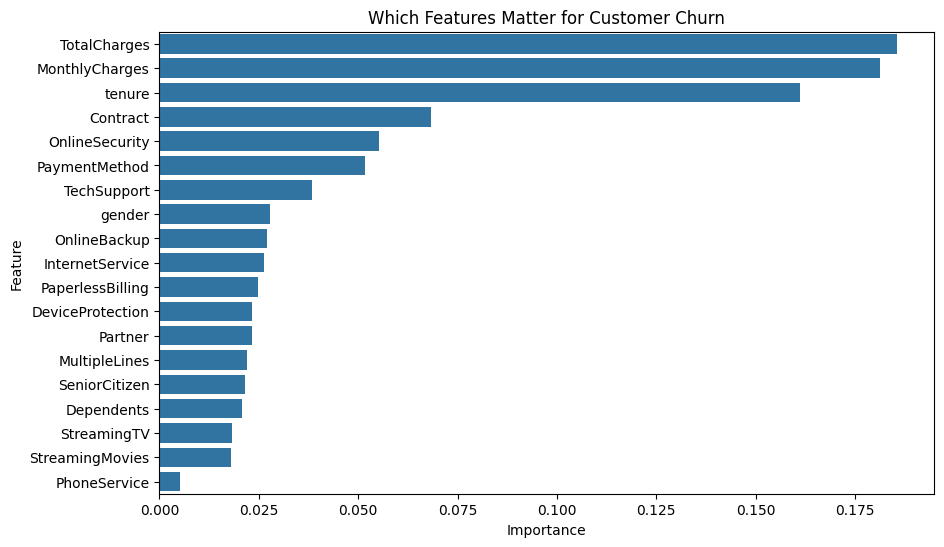

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Which Features Matter for Customer Churn")
plt.show()
